In [61]:
#!pip install dython

In [62]:
#!pip install category_encoders

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [64]:
plt.style.use("seaborn-v0_8")
sns.set_palette("rocket")
sns.set_context("talk")

# Import Data

In [60]:
from google.colab import files
files.upload()

import pandas as pd
df = pd.read_csv("mushrooms.csv")
df.head()


Saving mushrooms.csv to mushrooms (2).csv


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [66]:
df.shape

(8124, 23)

In [67]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [69]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [70]:
y = df['class'].map({'e':0, 'p':1})   # edible=0, poisonous=1
X = df.drop(columns=['class'])

# Variabel Dataset Mushroom
Dataset mushroom memuat karakteristik fisik jamur untuk memprediksi apakah suatu jamur **edible (dapat dimakan)** atau **poisonous (beracun)**. Setiap kolom berisi kode huruf yang mewakili kategori tertentu.

---

### • class  
- **Makna**: Jenis jamur (label target).  
- **Nilai**:  
  - `e` → edible (bisa dimakan)  
  - `p` → poisonous (beracun)

### • cap-shape  
- **Makna**: Bentuk topi jamur.  
- **Nilai**:  
  - `b` bell  
  - `c` conical  
  - `x` convex  
  - `f` flat  
  - `k` knobbed  
  - `s` sunken  

### • cap-surface  
- **Makna**: Permukaan topi.  
- **Nilai**:  
  - `f` fibrous  
  - `g` grooves  
  - `y` scaly  
  - `s` smooth

### • cap-color  
- **Makna**: Warna topi.  
- **Nilai**:  
  - `n` brown  
  - `b` buff  
  - `c` cinnamon  
  - `g` gray  
  - `r` green  
  - `p` pink  
  - `u` purple  
  - `e` red  
  - `w` white  
  - `y` yellow  

### • bruises  
- **Makna**: Apakah jamur menghitam (lebam) saat ditekan.  
- **Nilai**:  
  - `t` bruises  
  - `f` no bruises

### • odor  
- **Makna**: Bau jamur.  
- **Nilai**:  
  - `a` almond  
  - `l` anise  
  - `c` creosote  
  - `y` fishy  
  - `f` foul  
  - `m` musty  
  - `n` none  
  - `p` pungent  
  - `s` spicy  

### • gill-attachment  
- **Makna**: Cara insang menempel pada batang.  
- **Nilai**:  
  - `a` attached  
  - `d` descending  
  - `f` free  
  - `n` notched  

### • gill-spacing  
- **Makna**: Jarak antar insang.  
- **Nilai**:  
  - `c` close  
  - `w` crowded  
  - `d` distant  

### • gill-size  
- **Makna**: Ukuran insang.  
- **Nilai**:  
  - `b` broad  
  - `n` narrow  

### • gill-color  
- **Makna**: Warna insang.  
- **Nilai**: banyak (black, brown, buff, chocolate, dll)

### • stalk-shape  
- **Makna**: Bentuk batang.  
- **Nilai**:  
  - `e` enlarging  
  - `t` tapering  

### • stalk-root  
- **Makna**: Bentuk akar batang.  
- **Nilai**:  
  - `b` bulbous  
  - `c` club  
  - `u` cup  
  - `e` equal  
  - `z` rhizomorphs  
  - `r` rooted  
  - `?` missing  

### • stalk-surface-above-ring  
- **Makna**: Tekstur batang di atas ring.  
- **Nilai**: fibrous, scaly, silky, smooth

### • stalk-surface-below-ring  
- Sama seperti di atas, tetapi di bawah ring.

### • stalk-color-above-ring  
- **Makna**: Warna batang di atas ring.

### • stalk-color-below-ring  
- **Makna**: Warna batang di bawah ring.

### • veil-type  
- **Makna**: Jenis selubung.  
- **Nilai**:  
  - `u` universal (hampir semua datanya sama)

### • veil-color  
- **Makna**: Warna veil.

### • ring-number  
- **Makna**: Jumlah cincin pada batang.  
- **Nilai**:  
  - `n` none  
  - `o` one  
  - `t` two  

### • ring-type  
- **Makna**: Tipe cincin.  
- **Nilai**: cobwebby, evanescent, flaring, large, pendant, sheathing, zone  

### • spore-print-color  
- **Makna**: Warna spora jamur.

### • population  
- **Makna**: Banyaknya jamur tumbuh.  
- **Nilai**:  
  - `a` abundant  
  - `c` clustered  
  - `n` numerous  
  - `s` scattered  
  - `v` several  
  - `y` solitary  

### • habitat  
- **Makna**: Habitat tempat jamur ditemukan.  
- **Nilai**:  
  - `g` grasses  
  - `l` leaves  
  - `m` meadows  
  - `p` paths  
  - `u` urban  
  - `w` waste  
  - `d` woods  

# Exploratory Data Analysis

In [71]:
df = df.replace(r'^\?$', np.nan, regex=True)

In [72]:
df.isnull().sum(),

(class                          0
 cap-shape                      0
 cap-surface                    0
 cap-color                      0
 bruises                        0
 odor                           0
 gill-attachment                0
 gill-spacing                   0
 gill-size                      0
 gill-color                     0
 stalk-shape                    0
 stalk-root                  2480
 stalk-surface-above-ring       0
 stalk-surface-below-ring       0
 stalk-color-above-ring         0
 stalk-color-below-ring         0
 veil-type                      0
 veil-color                     0
 ring-number                    0
 ring-type                      0
 spore-print-color              0
 population                     0
 habitat                        0
 dtype: int64,)

In [73]:
total_rows = len(df)
missing_stalk_root = df['stalk-root'].isna().sum()
percent_missing = (missing_stalk_root / total_rows) * 100
print("Persentase missing stalk-root:", percent_missing)

Persentase missing stalk-root: 30.526834071885773


In [74]:
mode_value = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].fillna(mode_value)
print(f"Kolom 'stalk-root' diimputasi dengan modus: {mode_value}")

Kolom 'stalk-root' diimputasi dengan modus: b


In [75]:
if df['veil-type'].nunique() == 1:
    df = df.drop(columns=['veil-type'])
    print("veil-type dihapus karena hanya punya 1 nilai unik.")
else:
    print("veil-type tidak dihapus, karena jumlah nilai unik lebih dari 1.")

veil-type dihapus karena hanya punya 1 nilai unik.


In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [78]:
for col in df.columns:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())


=== class ===
class
e    4208
p    3916
Name: count, dtype: int64

=== cap-shape ===
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

=== cap-surface ===
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

=== cap-color ===
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

=== bruises ===
bruises
f    4748
t    3376
Name: count, dtype: int64

=== odor ===
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

=== gill-attachment ===
gill-attachment
f    7914
a     210
Name: count, dtype: int64

=== gill-spacing ===
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

=== gill-size ===
gill-size
b    5612
n    2512
Name: count, dtype: int64

=== gill-color ===
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e   

In [79]:
threshold = 0.01
n = len(df)

for col in df.columns:
    rare = df[col].value_counts(normalize=True)
    rare = rare[rare < threshold]
    if len(rare) > 0:
        print(f"\nRARE CATEGORY in {col}:")
        print(rare)


RARE CATEGORY in cap-shape:
cap-shape
s    0.003939
c    0.000492
Name: proportion, dtype: float64

RARE CATEGORY in cap-surface:
cap-surface
g    0.000492
Name: proportion, dtype: float64

RARE CATEGORY in cap-color:
cap-color
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64

RARE CATEGORY in odor:
odor
m    0.004431
Name: proportion, dtype: float64

RARE CATEGORY in gill-color:
gill-color
o    0.007878
r    0.002954
Name: proportion, dtype: float64

RARE CATEGORY in stalk-surface-above-ring:
stalk-surface-above-ring
y    0.002954
Name: proportion, dtype: float64

RARE CATEGORY in stalk-color-above-ring:
stalk-color-above-ring
c    0.004431
y    0.000985
Name: proportion, dtype: float64

RARE CATEGORY in stalk-color-below-ring:
stalk-color-below-ring
c    0.004431
y    0.002954
Name: proportion, dtype: float64

RARE CATEGORY in veil-color:
veil-color
y    0.000985
Name: proportion, dtype: float64

RARE CATEGORY in ring-number:
ring-number
n    0.004431
Name:

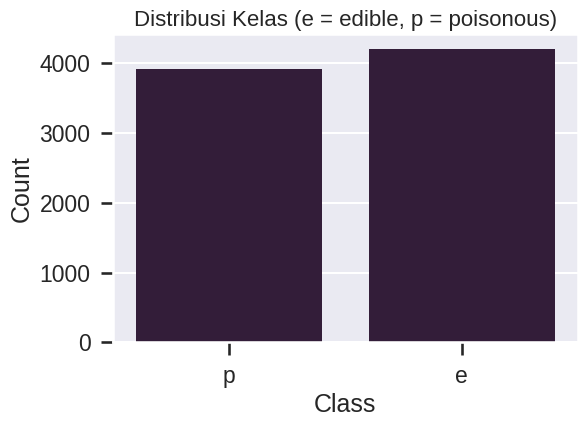

In [80]:
# Target distribution
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=df["class"], ax=ax)
ax.set_title("Distribusi Kelas (e = edible, p = poisonous)", fontsize=16)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.show()

In [107]:
print(df["class"].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64


In [111]:
from scipy.stats import entropy
import numpy as np

p = df['class'].value_counts(normalize=True)
entropy_value = entropy(p, base=2)

entropy_value

np.float64(0.9990678968724604)

/tmp/ipython-input-1076351122.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




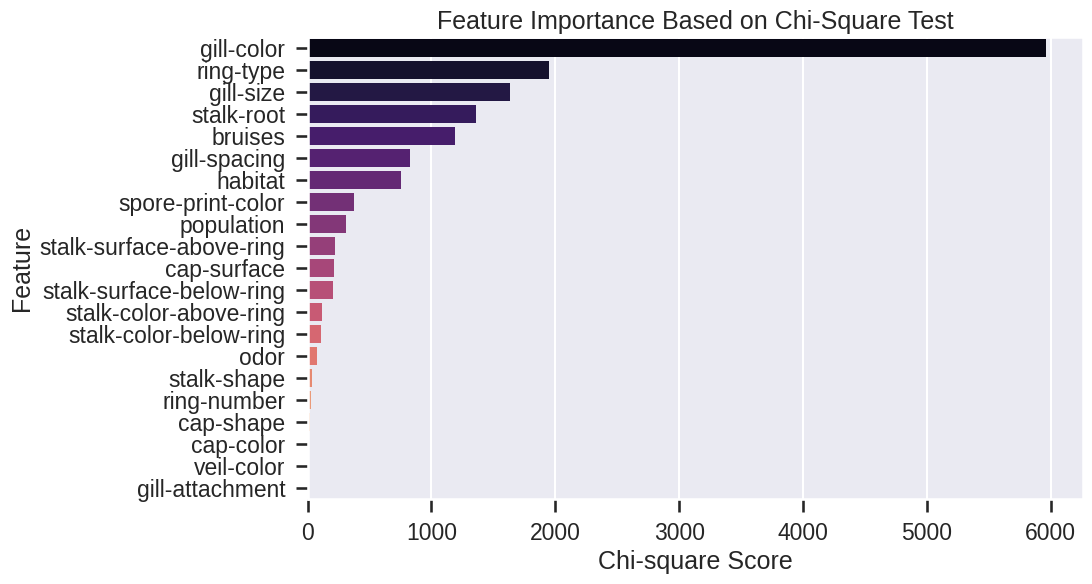

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=chi_scores.values,
    y=chi_scores.index,
    palette="magma"
)
plt.title("Feature Importance Based on Chi-Square Test", fontsize=18)
plt.xlabel("Chi-square Score")
plt.ylabel("Feature")
plt.show()

/tmp/ipython-input-1280129810.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




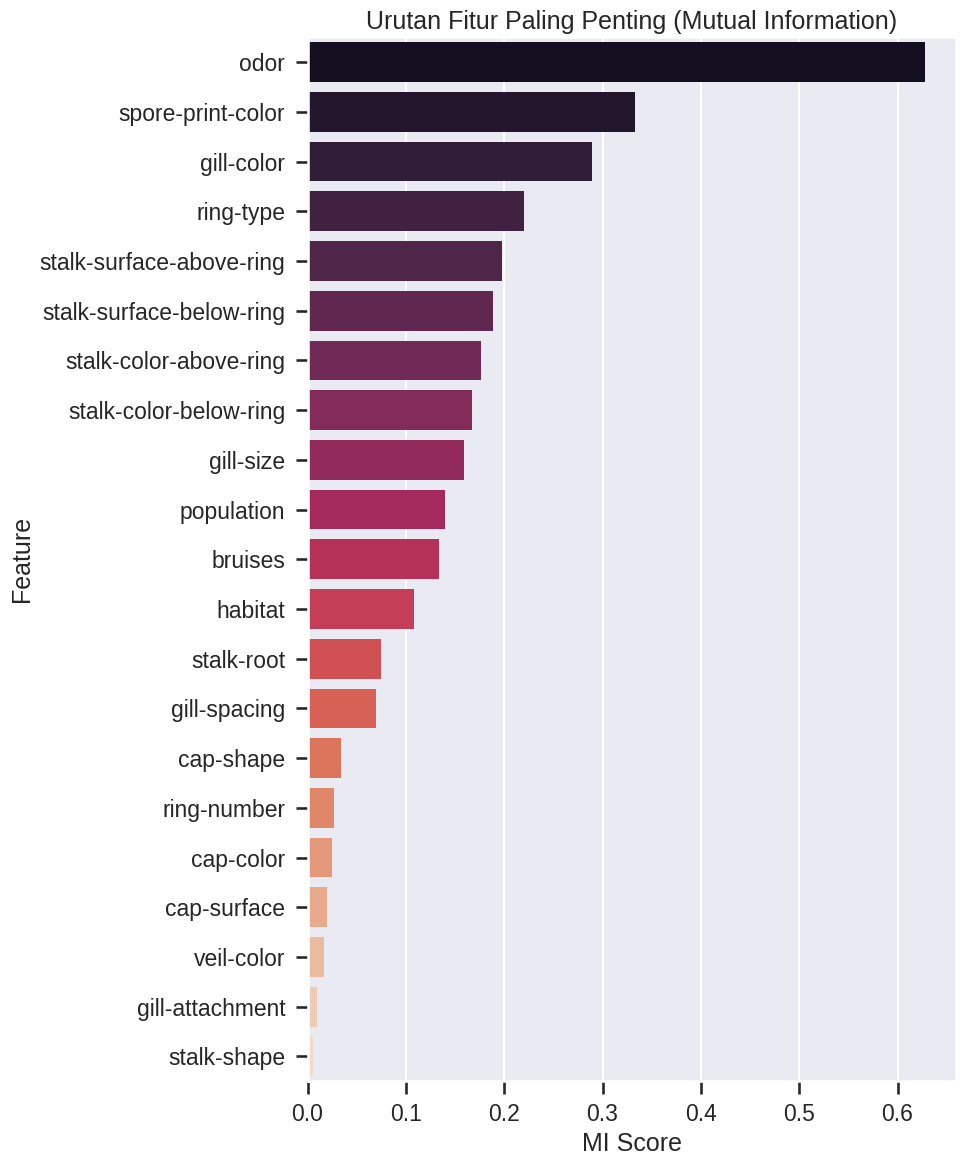

,0
odor,0.628043
spore-print-color,0.333199
gill-color,0.289027
ring-type,0.220436
stalk-surface-above-ring,0.197357
stalk-surface-below-ring,0.188463
stalk-color-above-ring,0.175952
stalk-color-below-ring,0.167337
gill-size,0.159531
population,0.139987


In [81]:
df_ord = df.copy()
enc = OrdinalEncoder()
df_ord[df.columns] = enc.fit_transform(df)

X = df_ord.drop("class", axis=1)
y = df_ord["class"]

mi = mutual_info_classif(X, y, discrete_features=True)

mi_series = pd.Series(mi, index=X.columns)\
                .sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(
    x=mi_series.values,
    y=mi_series.index,
    palette="rocket"
)
plt.title("Urutan Fitur Paling Penting (Mutual Information)", fontsize=18)
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

mi_series

In [112]:
importance_df = pd.DataFrame({
    "MI": mi_series,
    "ChiSquare": chi_scores
})

importance_df["Rank"] = importance_df.rank(ascending=False).mean(axis=1)
importance_df.sort_values("Rank")

,MI,ChiSquare,Rank
gill-color,0.289027,5957.764469,2.0
ring-type,0.220436,1950.610146,3.0
spore-print-color,0.333199,379.132729,5.0
gill-size,0.159531,1636.606833,6.0
stalk-surface-above-ring,0.197357,222.982400,7.5
bruises,0.133347,1194.277352,8.0
odor,0.628043,75.910163,8.0
stalk-root,0.075102,1358.358638,8.5
stalk-surface-below-ring,0.188463,206.648180,9.0
habitat,0.108709,751.309489,9.5


In [113]:
top12_features = [
    'gill-color',
    'ring-type',
    'spore-print-color',
    'gill-size',
    'bruises',
    'stalk-surface-above-ring',
    'odor',
    'stalk-root',
    'stalk-surface-below-ring',
    'habitat',
    'population',
    'gill-spacing'
]

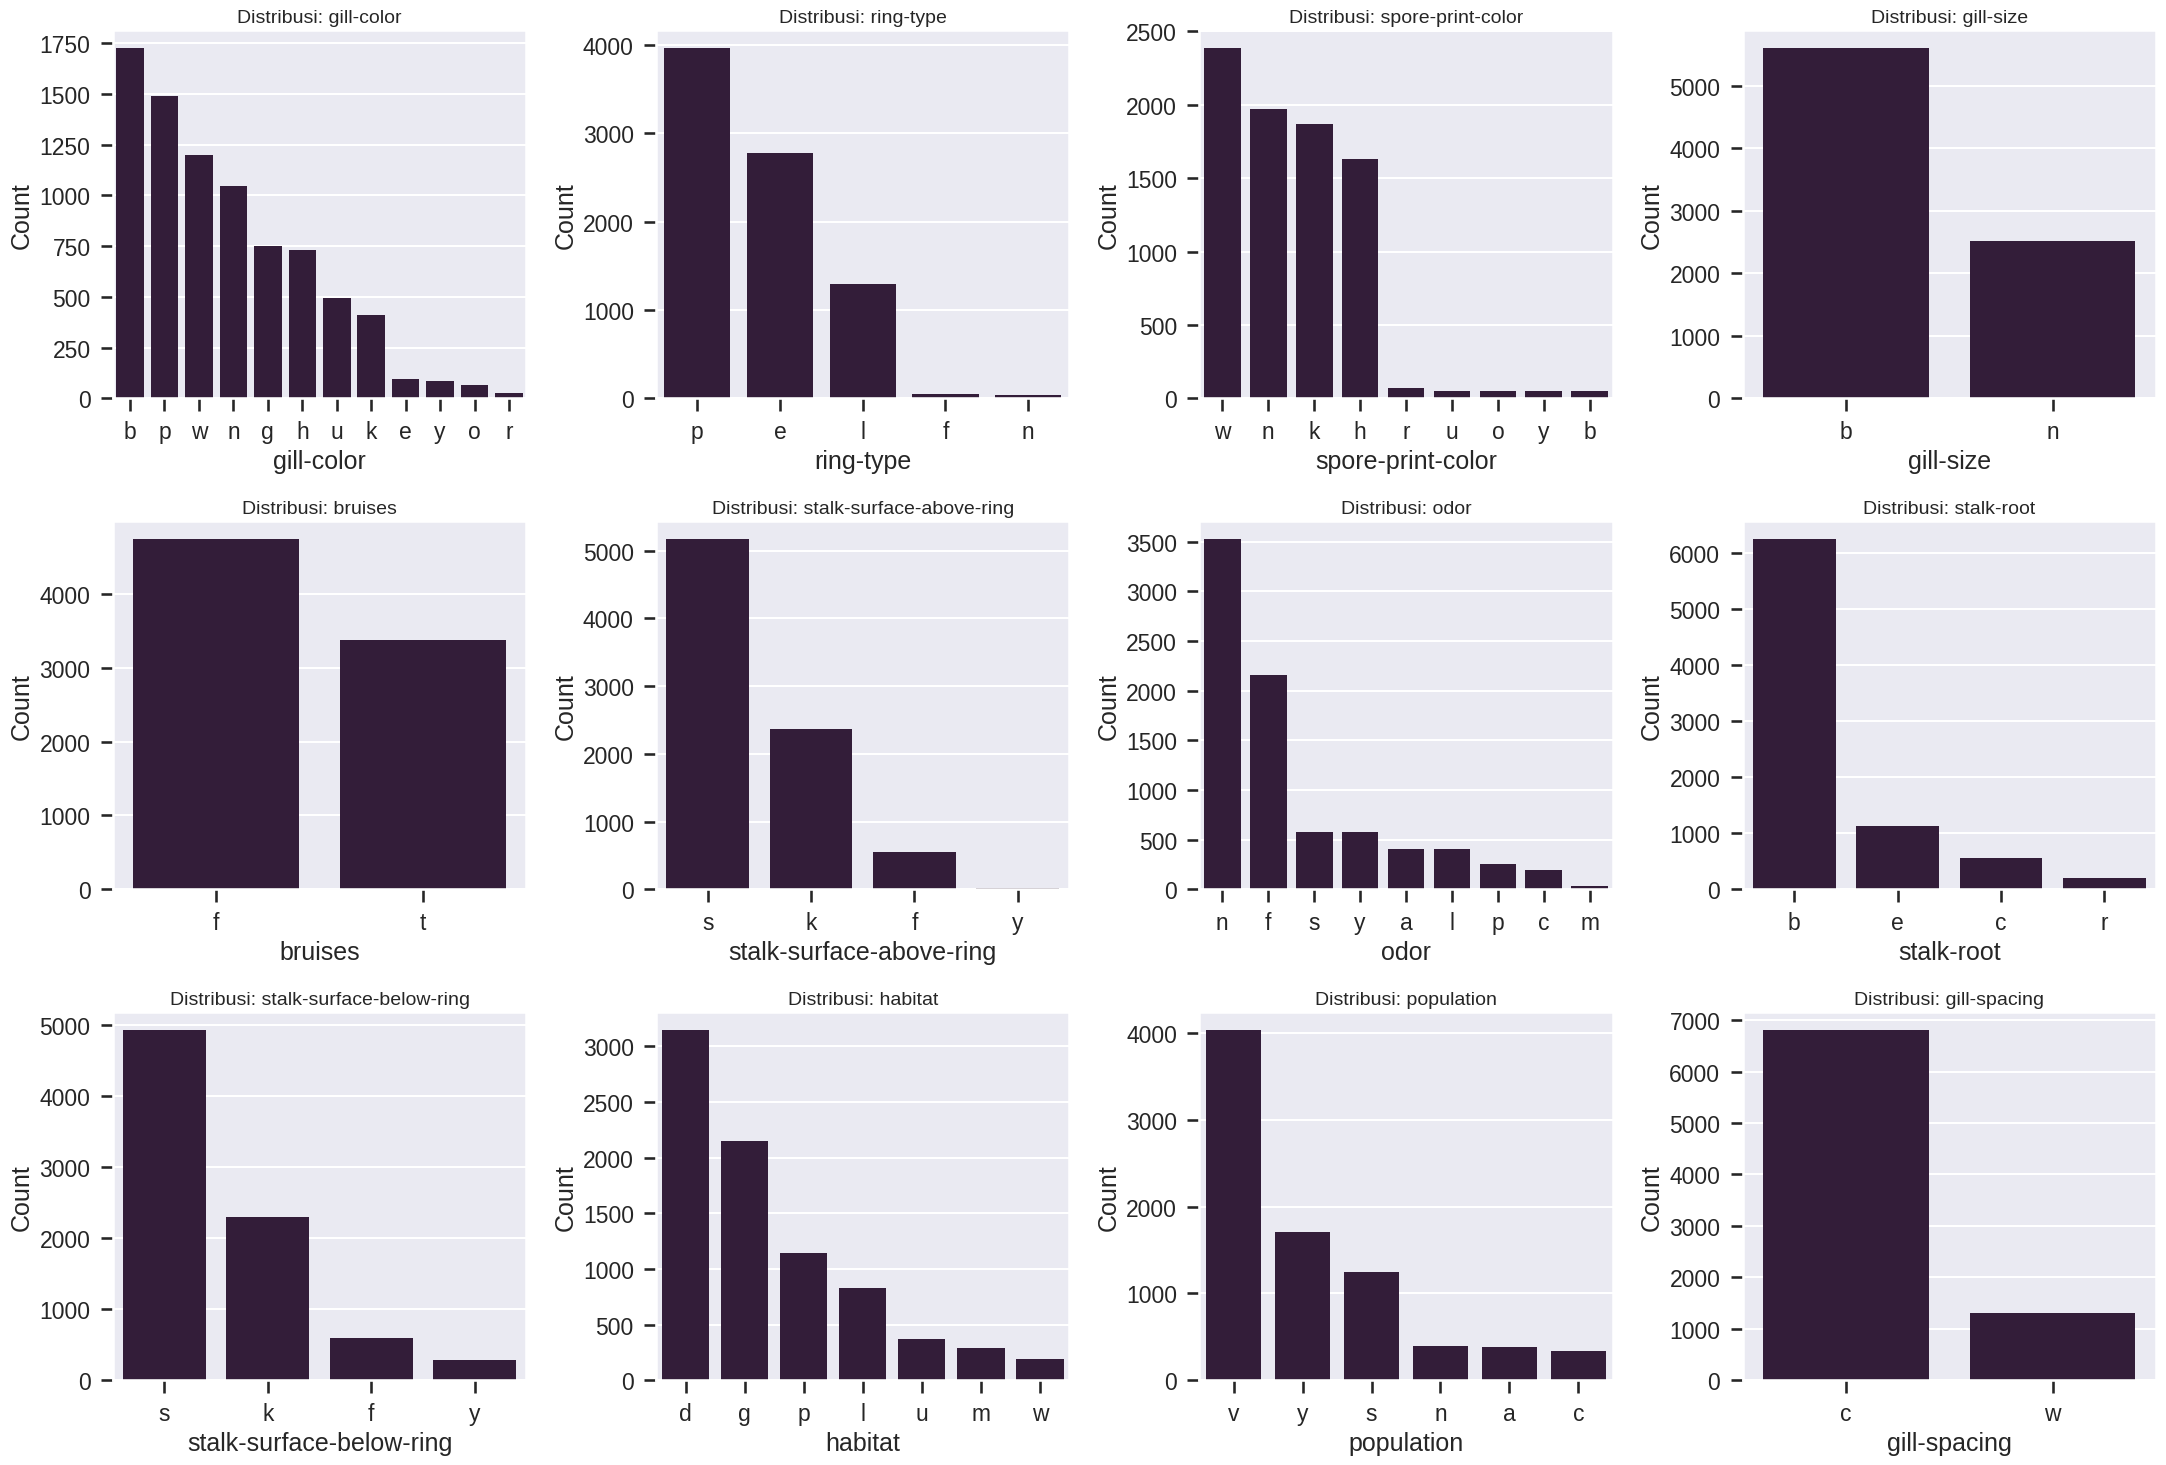

In [114]:
top12_features = [
    'gill-color', 'ring-type', 'spore-print-color', 'gill-size', 'bruises',
    'stalk-surface-above-ring', 'odor', 'stalk-root', 'stalk-surface-below-ring',
    'habitat', 'population', 'gill-spacing'
]

fig, axes = plt.subplots(3, 4, figsize=(22, 15))
axes = axes.flatten()

for idx, col in enumerate(top12_features):
    sns.countplot(
        x=df[col],
        order=df[col].value_counts().index,
        ax=axes[idx]
    )
    axes[idx].set_title(f"Distribusi: {col}", fontsize=14)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

# Supaya subplot terakhir tidak kosong kalau jumlahnya pas
plt.tight_layout()
plt.show()

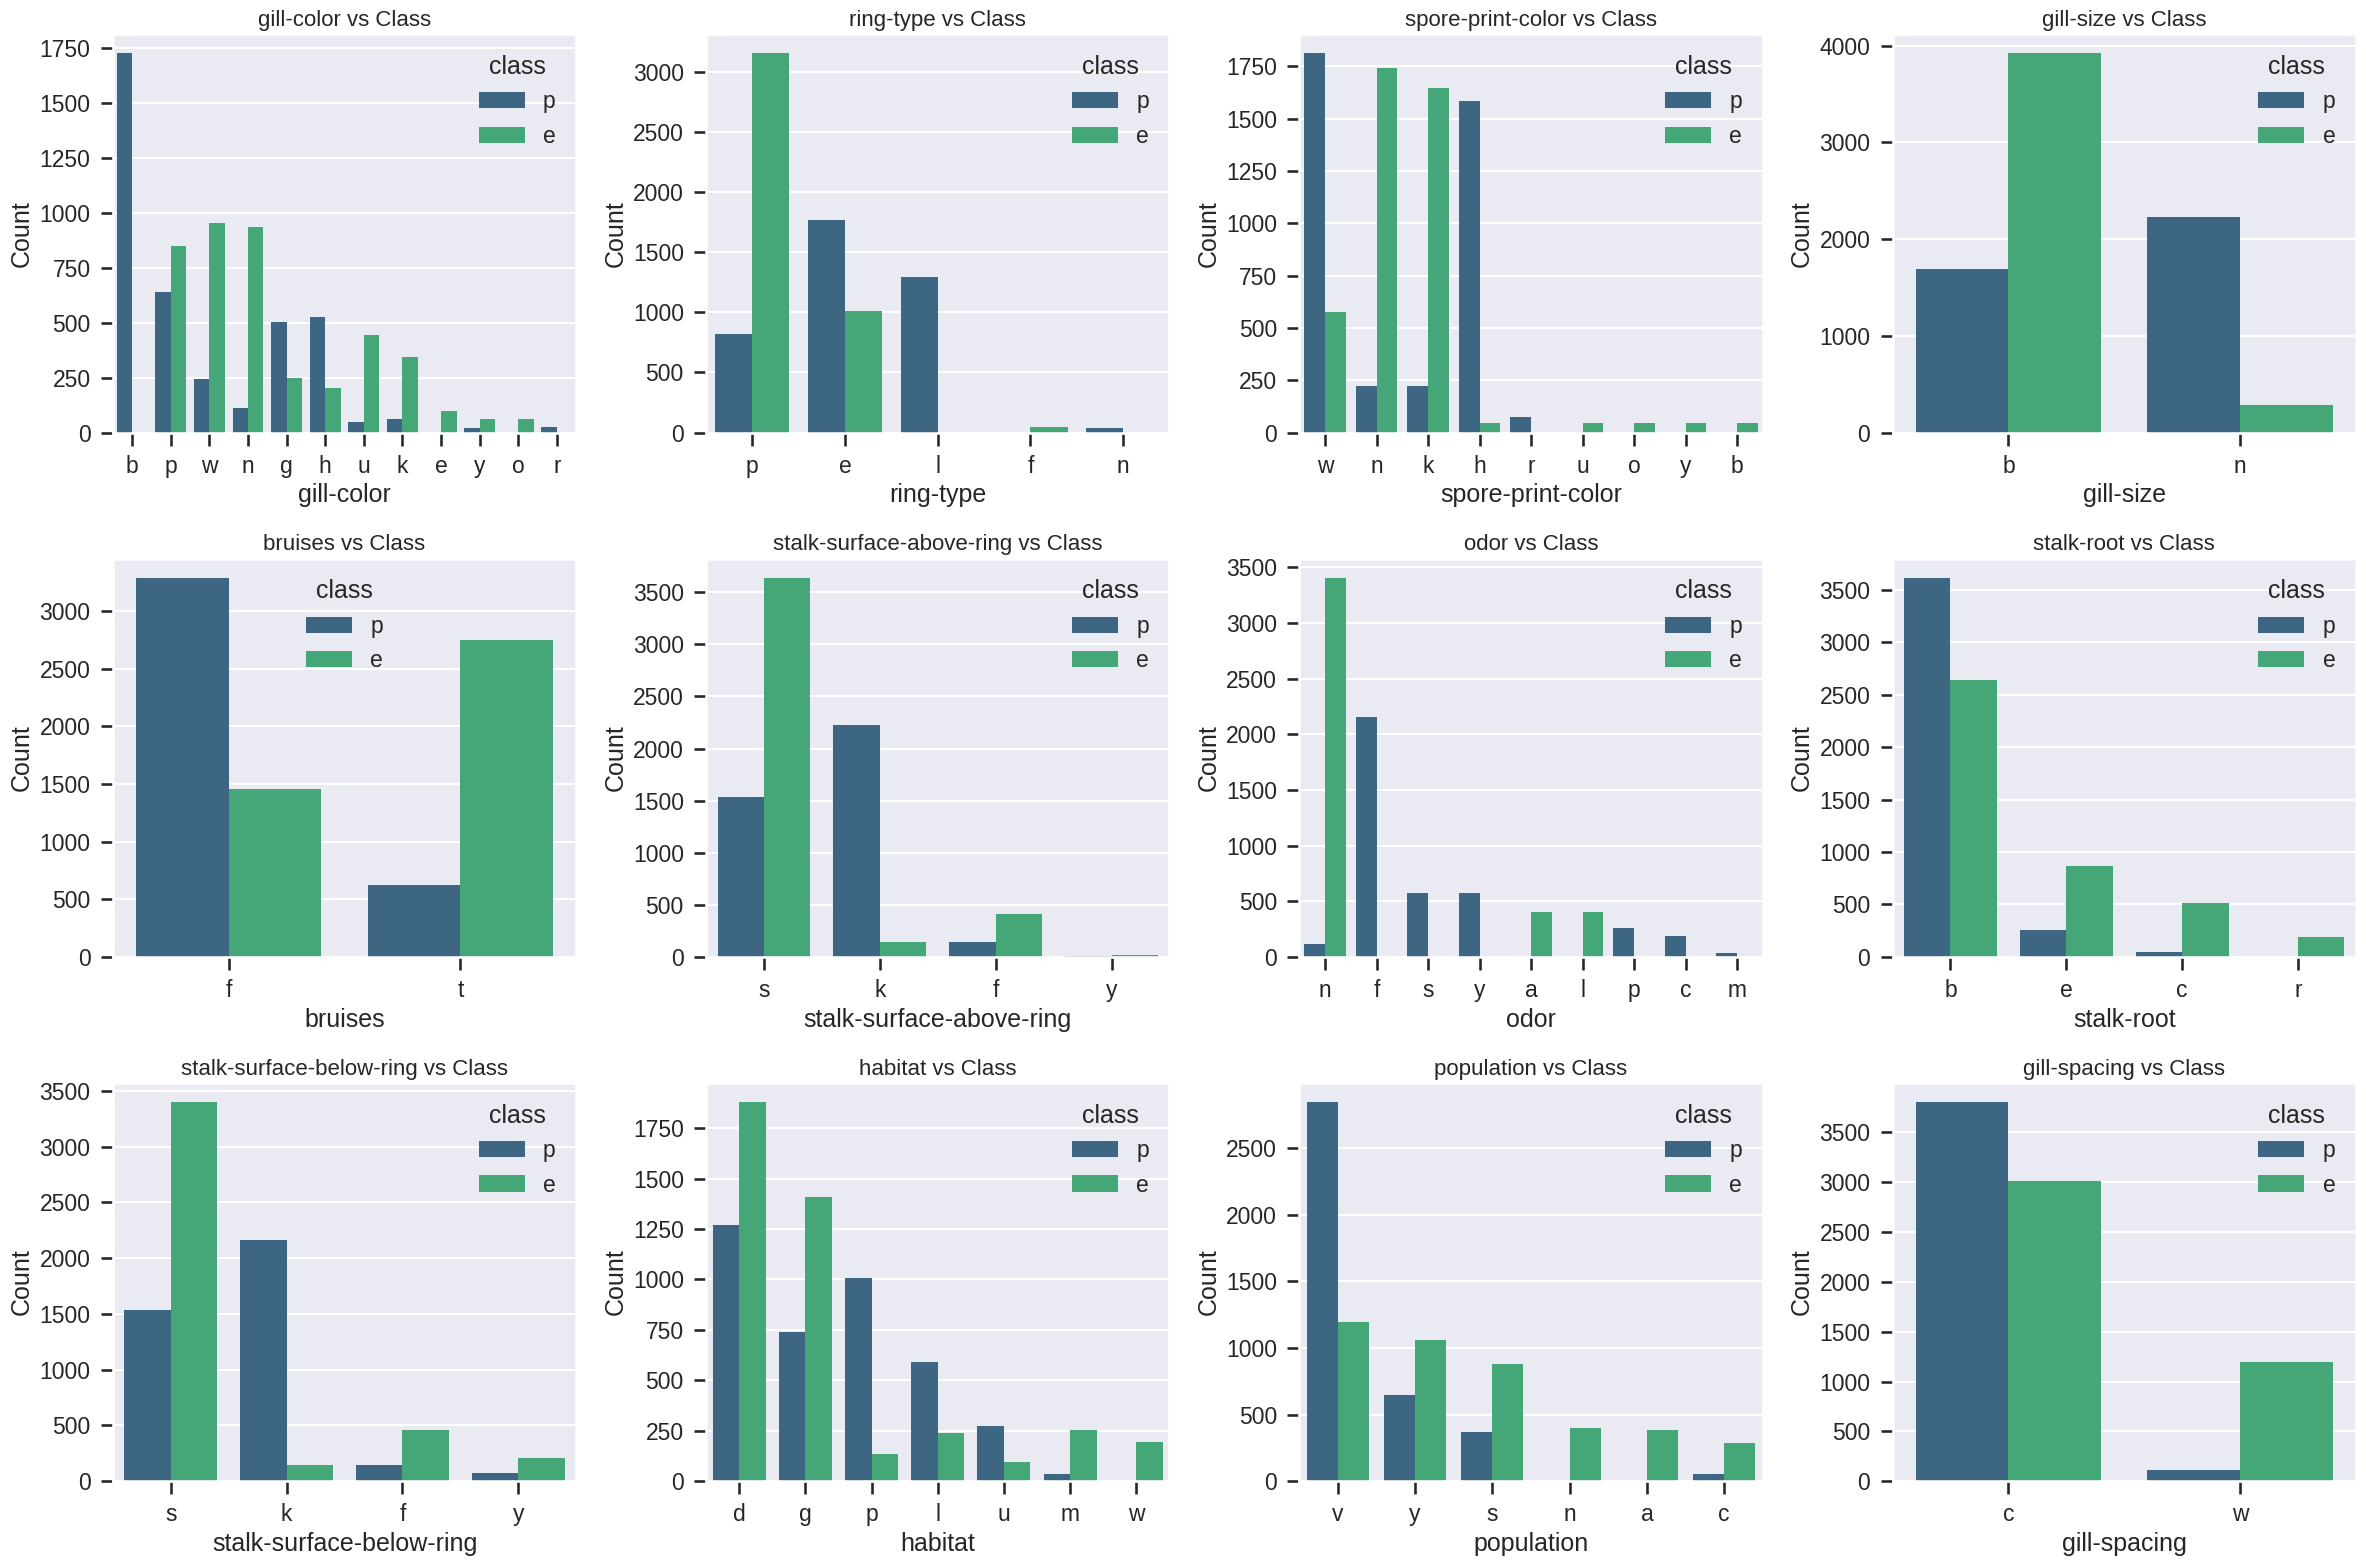

In [115]:
top12_features = [
    'gill-color', 'ring-type', 'spore-print-color', 'gill-size', 'bruises',
    'stalk-surface-above-ring', 'odor', 'stalk-root', 'stalk-surface-below-ring',
    'habitat', 'population', 'gill-spacing'
]

fig, axes = plt.subplots(3, 4, figsize=(24, 16))
axes = axes.flatten()

for idx, col in enumerate(top12_features):
    sns.countplot(
        x=df[col],
        hue=df["class"],
        order=df[col].value_counts().index,
        palette="viridis",
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} vs Class", fontsize=16)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.show()

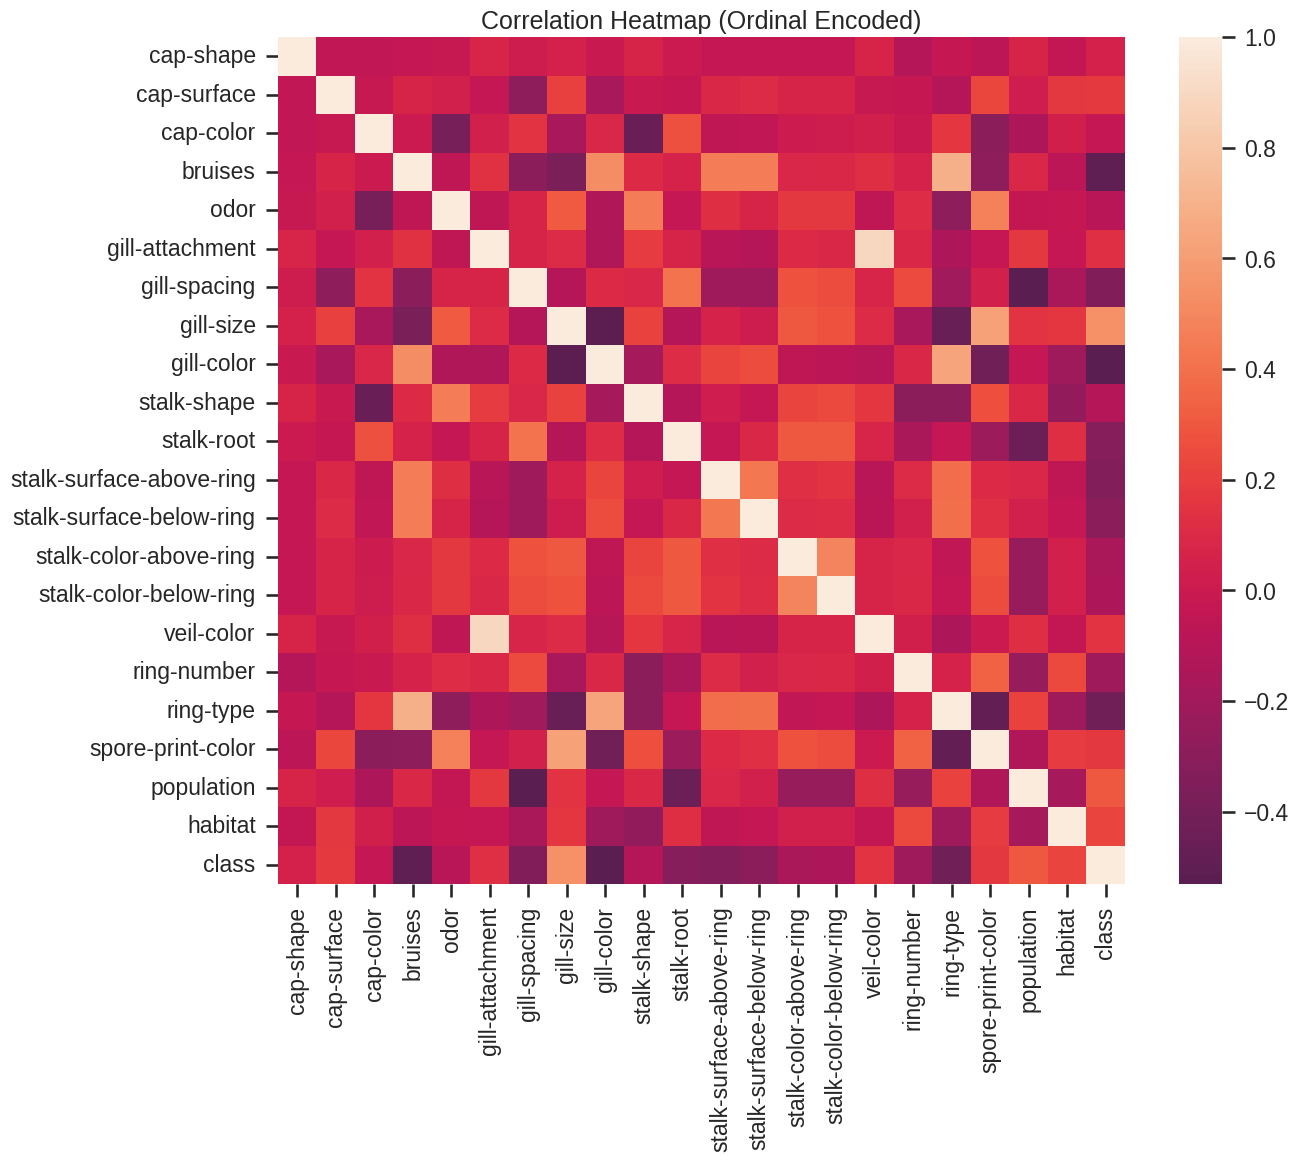

In [84]:
corr = X.join(y).corr()

plt.figure(figsize=(14,11))
sns.heatmap(corr, cmap="rocket", center=0, square=True)
plt.title("Correlation Heatmap (Ordinal Encoded)", fontsize=18)
plt.show()

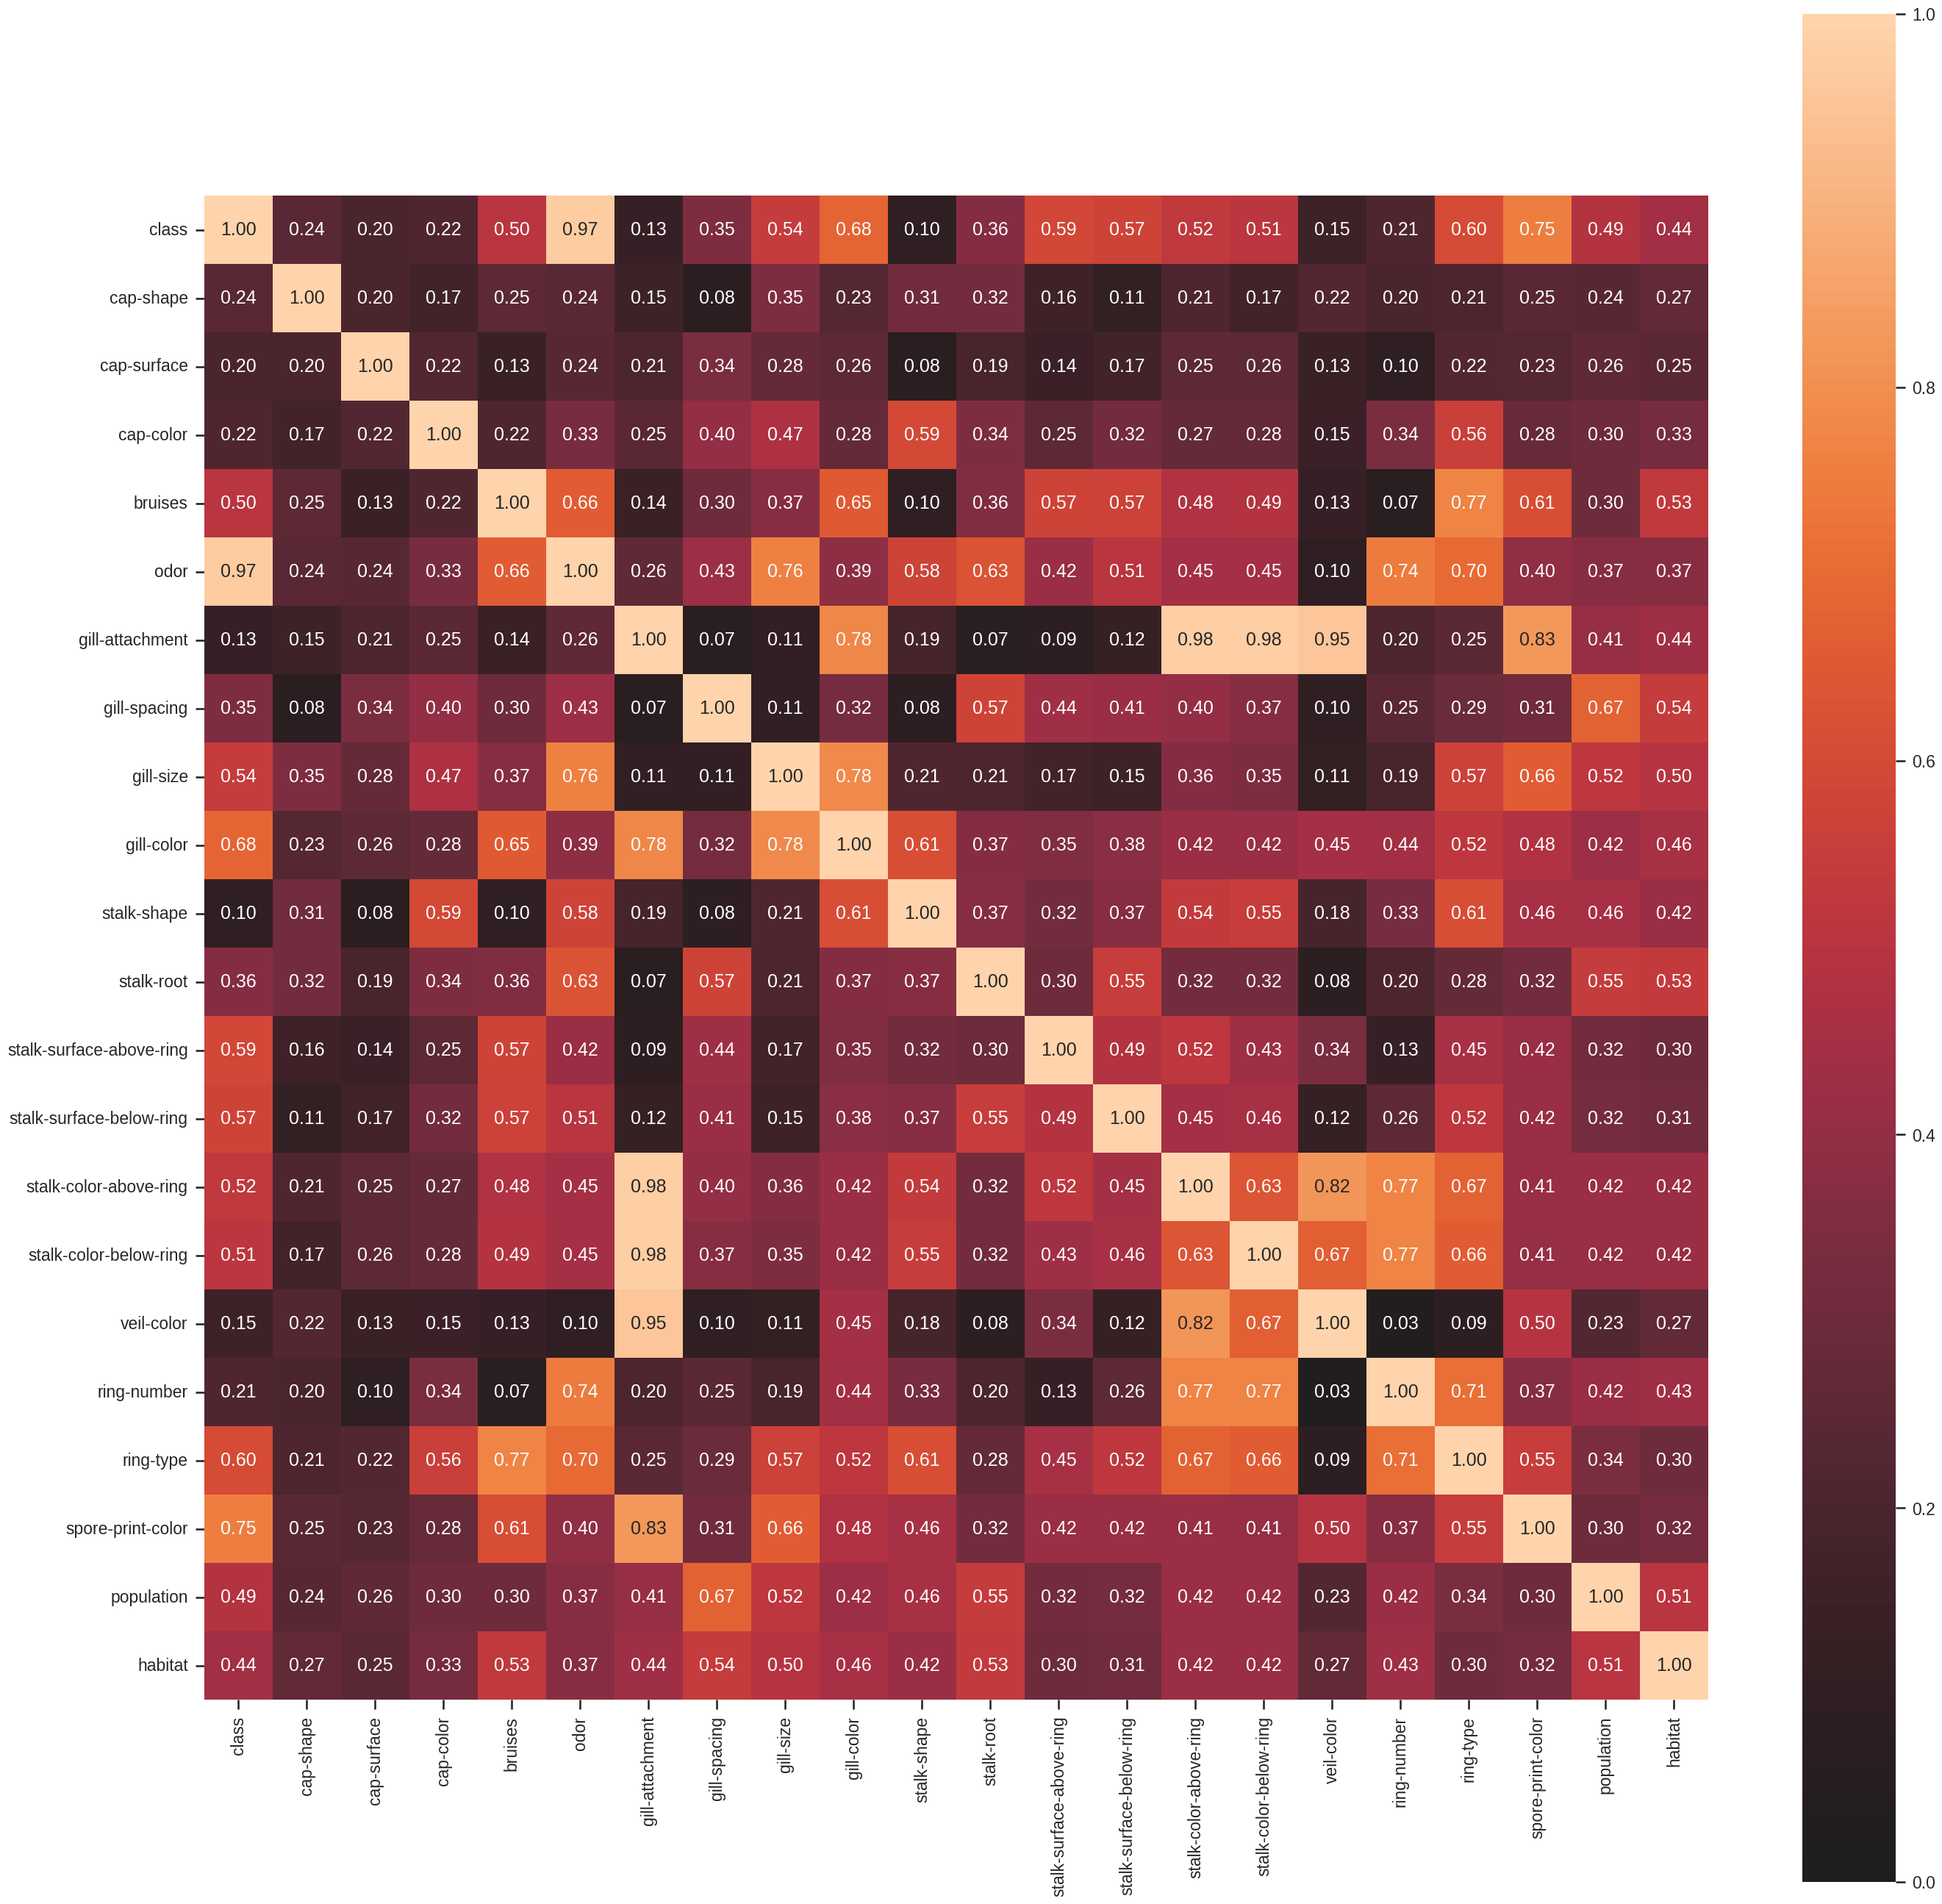

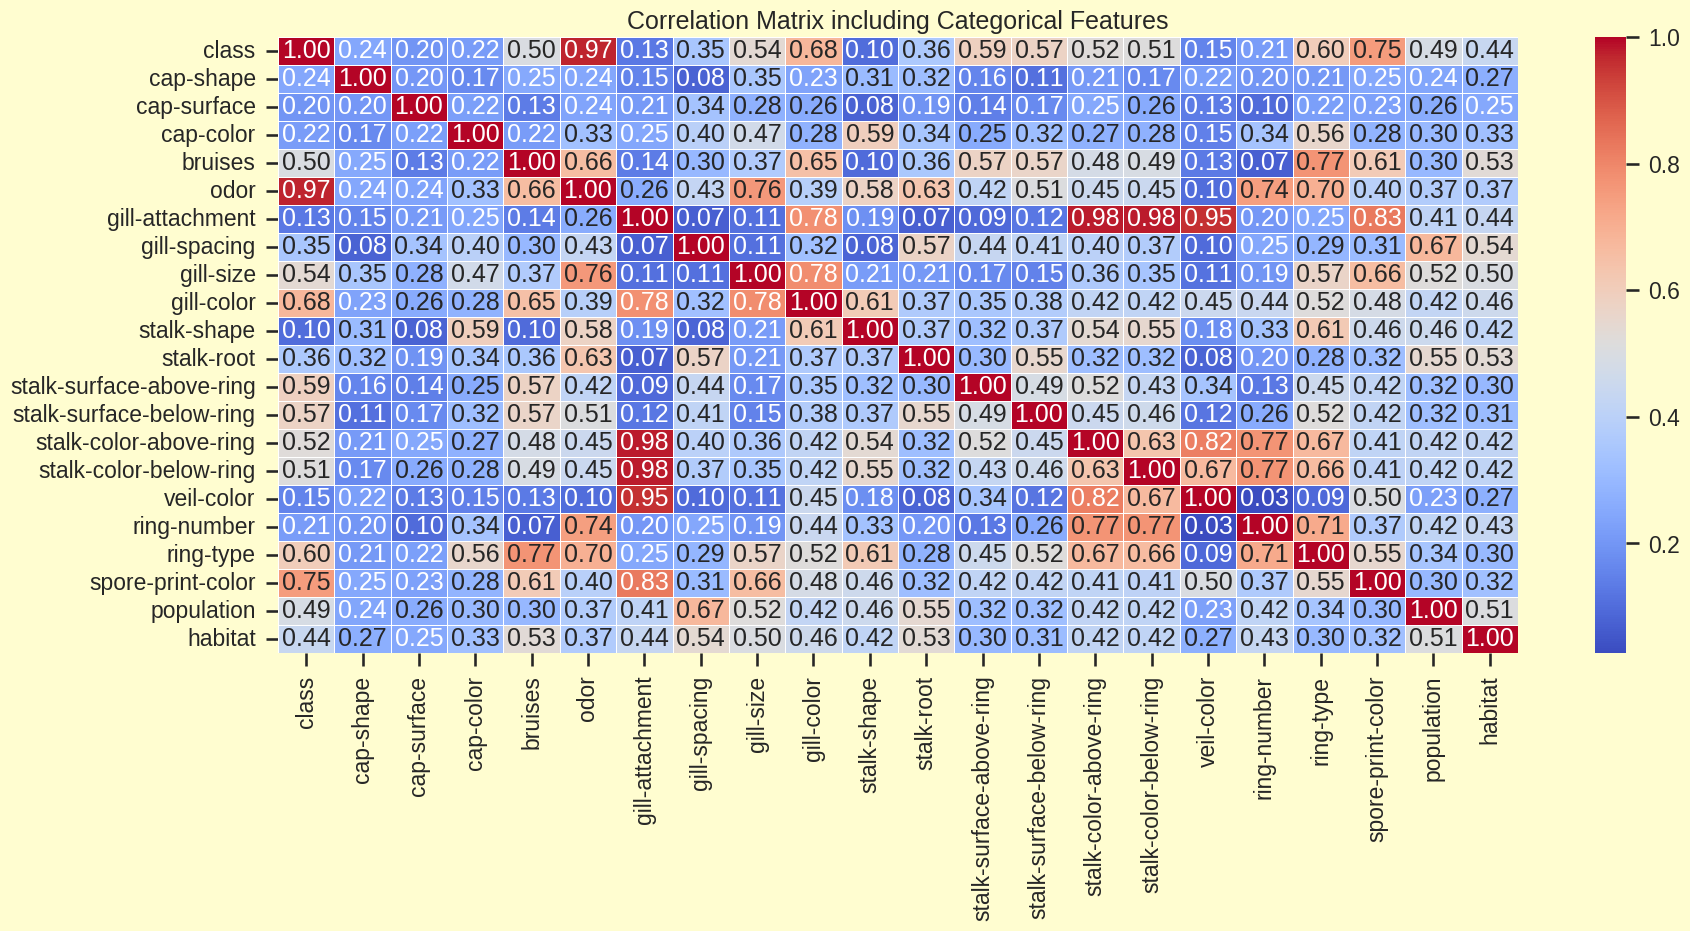

In [85]:
from dython.nominal import associations

associations_df = associations(df[:10000], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [86]:
import plotly.express as px

# Ambil sampel agar lebih cepat
sample_df = df.sample(8000, random_state=42)

# Hitung kombinasi dua feature
sun_df = (
    sample_df.groupby(['cap-shape', 'cap-color'])
    .size()
    .reset_index(name='jumlah')
)

# Buat sunburst
fig = px.sunburst(
    sun_df,
    path=['cap-shape', 'cap-color'],
    values='jumlah',
    color='jumlah',
    color_continuous_scale='Plasma',
    title='Distribusi Cap Shape → Cap Color'
)

fig.update_layout(
    title_x=0.5,
    height=600,
)
fig.show()

In [87]:
import plotly.graph_objects as go

# Sampling
sankey_df = df.sample(7000, random_state=10)

flow = (
    sankey_df.groupby(['cap-shape', 'cap-color'])
    .size()
    .reset_index(name='freq')
)

# Buat label unik
node_labels = pd.unique(flow[['cap-shape', 'cap-color']].values.ravel())
idx = {label: i for i, label in enumerate(node_labels)}

# Mapping source-target
src = flow['cap-shape'].map(idx)
tgt = flow['cap-color'].map(idx)
val = flow['freq']

# Plot sankey
fig = go.Figure(go.Sankey(
    node=dict(
        label=node_labels,
        pad=12,
        thickness=18,
    ),
    link=dict(
        source=src,
        target=tgt,
        value=val
    )
))

fig.update_layout(
    title='Relasi Cap Shape → Cap Color (Sankey Diagram)',
    title_x=0.5,
    height=550
)

fig.show()

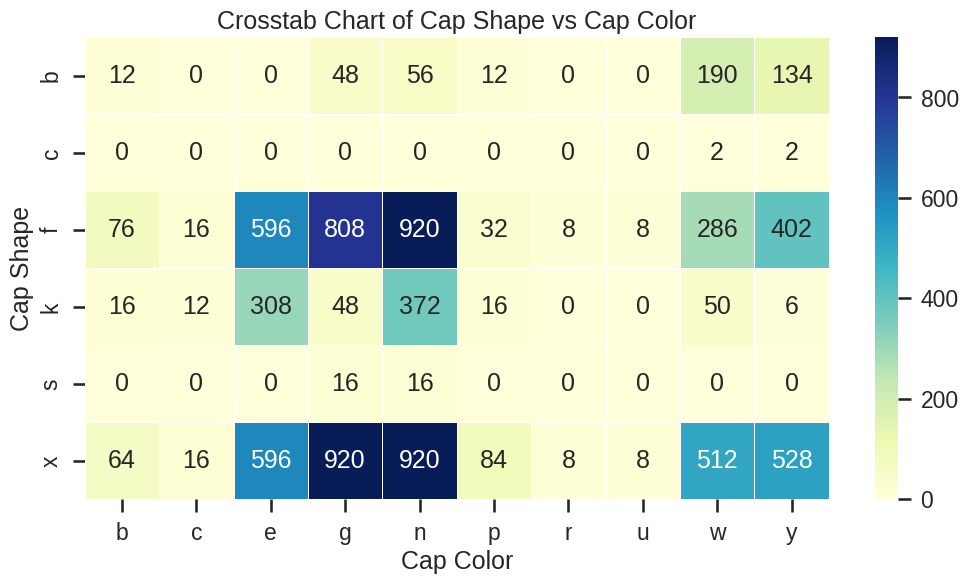

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab
ct = pd.crosstab(df['cap-shape'], df['cap-color'])

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    ct,
    annot=True,
    cmap="YlGnBu",
    linewidths=.5,
    fmt="d"
)

plt.title("Crosstab Chart of Cap Shape vs Cap Color", fontsize=18)
plt.xlabel("Cap Color")
plt.ylabel("Cap Shape")
plt.show()

<Figure size 1500x600 with 0 Axes>

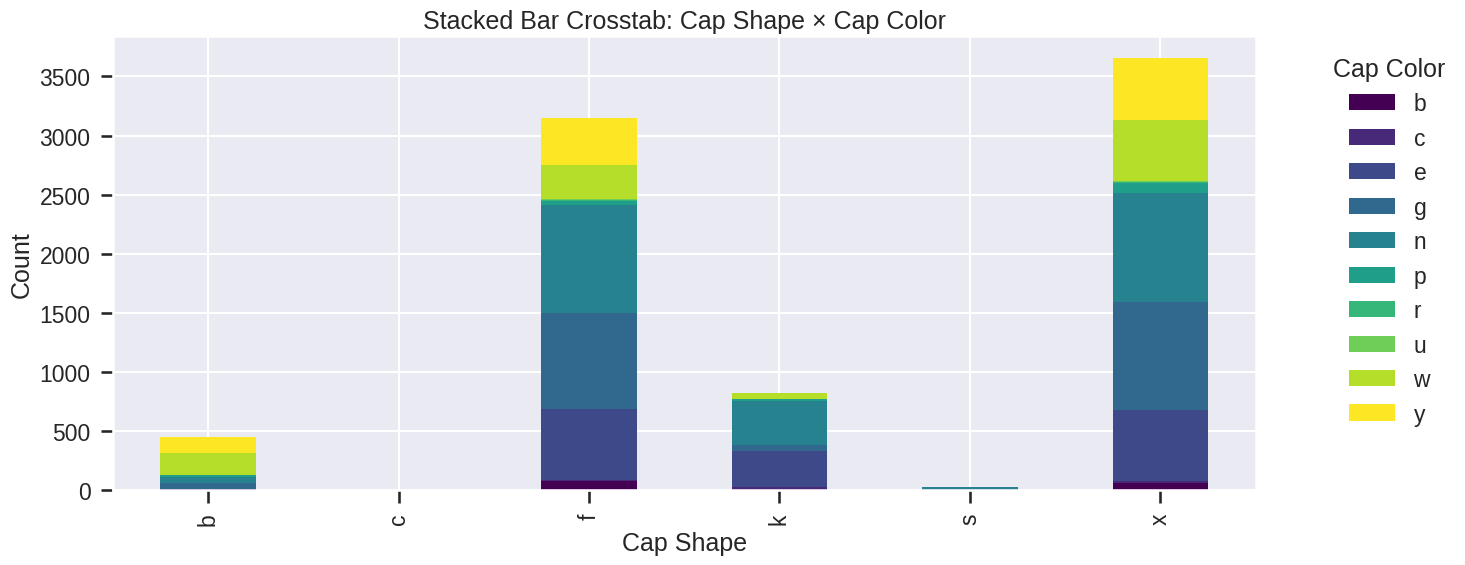

In [89]:
ct = pd.crosstab(df['cap-shape'], df['cap-color'])

plt.figure(figsize=(15,6))
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15,6))

plt.title("Stacked Bar Crosstab: Cap Shape × Cap Color")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.legend(title="Cap Color", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Feature Selection

## Feature Selection (MI)

In [90]:
from sklearn.preprocessing import OrdinalEncoder

df_enc = df.copy()
encoder = OrdinalEncoder()
df_enc[df.columns] = encoder.fit_transform(df)

/tmp/ipython-input-1693011928.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




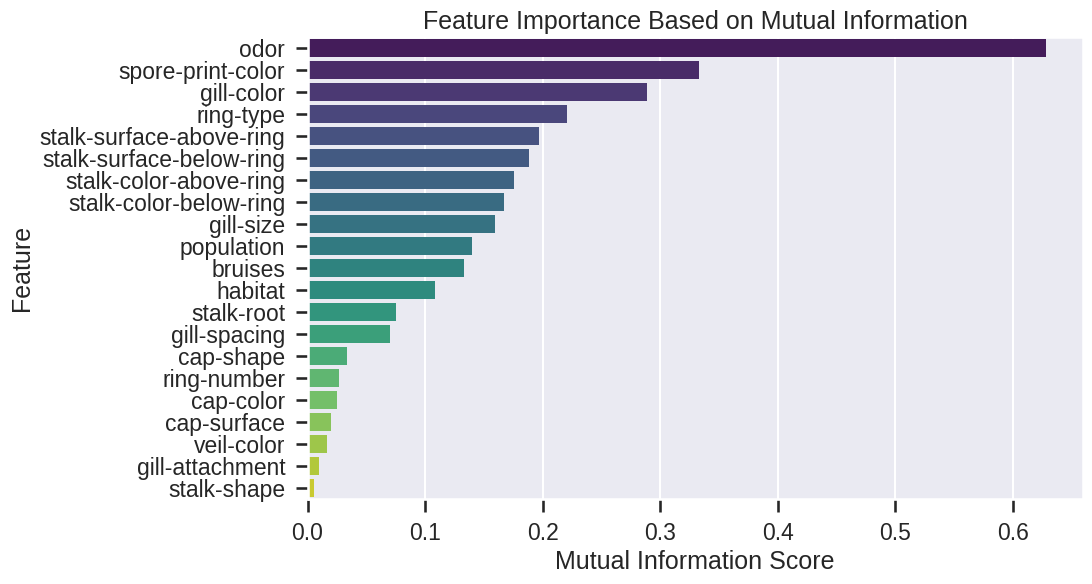

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x=mi_series.values,
    y=mi_series.index,
    palette="viridis"
)
plt.title("Feature Importance Based on Mutual Information", fontsize=18)
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

In [92]:
mi_series

,0
odor,0.628043
spore-print-color,0.333199
gill-color,0.289027
ring-type,0.220436
stalk-surface-above-ring,0.197357
stalk-surface-below-ring,0.188463
stalk-color-above-ring,0.175952
stalk-color-below-ring,0.167337
gill-size,0.159531
population,0.139987


## Feature Selection (Chi-square)

/tmp/ipython-input-1076351122.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




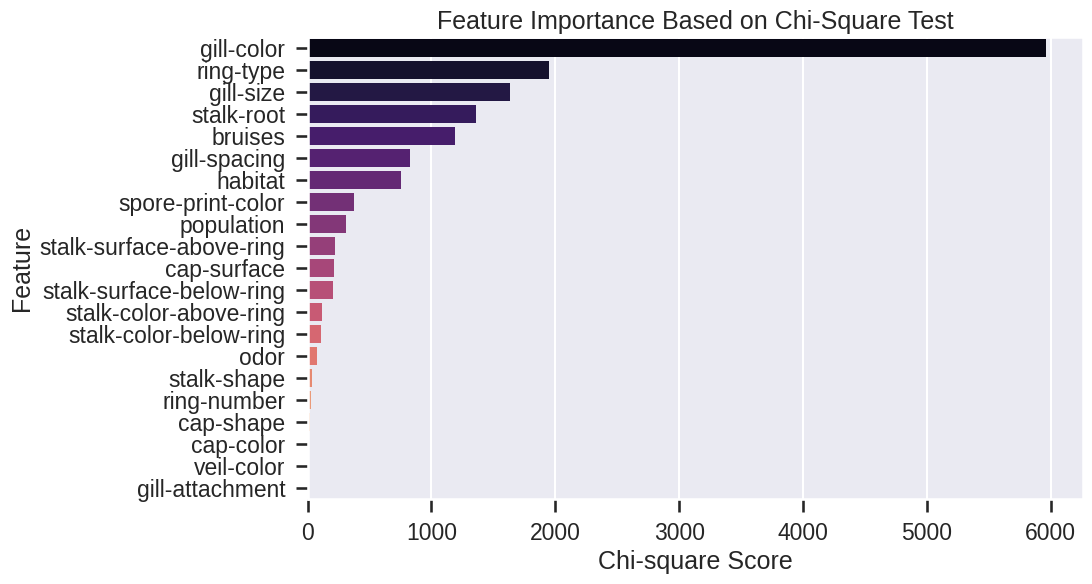

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=chi_scores.values,
    y=chi_scores.index,
    palette="magma"
)
plt.title("Feature Importance Based on Chi-Square Test", fontsize=18)
plt.xlabel("Chi-square Score")
plt.ylabel("Feature")
plt.show()

In [93]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X, y)

chi_scores = pd.Series(chi_selector.scores_, index=X.columns).sort_values(ascending=False)
chi_scores

,0
gill-color,5957.764469
ring-type,1950.610146
gill-size,1636.606833
stalk-root,1358.358638
bruises,1194.277352
gill-spacing,826.795274
habitat,751.309489
spore-print-color,379.132729
population,311.766736
stalk-surface-above-ring,222.982400


## Gabungan MI dan Chi-Square

In [95]:
importance_df = pd.DataFrame({
    "MI": mi_series,
    "ChiSquare": chi_scores
})

importance_df["Rank"] = importance_df.rank(ascending=False).mean(axis=1)
importance_df.sort_values("Rank")

,MI,ChiSquare,Rank
gill-color,0.289027,5957.764469,2.0
ring-type,0.220436,1950.610146,3.0
spore-print-color,0.333199,379.132729,5.0
gill-size,0.159531,1636.606833,6.0
stalk-surface-above-ring,0.197357,222.982400,7.5
bruises,0.133347,1194.277352,8.0
odor,0.628043,75.910163,8.0
stalk-root,0.075102,1358.358638,8.5
stalk-surface-below-ring,0.188463,206.648180,9.0
habitat,0.108709,751.309489,9.5


In [96]:
top12_features = [
    'gill-color',
    'ring-type',
    'spore-print-color',
    'gill-size',
    'bruises',
    'stalk-surface-above-ring',
    'odor',
    'stalk-root',
    'stalk-surface-below-ring',
    'habitat',
    'population',
    'gill-spacing'
]

X = df[top12_features]
y = df['class'].map({'e':0, 'p':1})

In [97]:
X

,gill-color,ring-type,spore-print-color,gill-size,bruises,stalk-surface-above-ring,odor,stalk-root,stalk-surface-below-ring,habitat,population,gill-spacing
0,k,p,k,n,t,s,p,e,s,u,s,c
1,k,p,n,b,t,s,a,c,s,g,n,c
2,n,p,n,b,t,s,l,c,s,m,n,c
3,n,p,k,n,t,s,p,e,s,u,s,c
4,k,e,n,b,f,s,n,e,s,g,a,w
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,y,p,b,b,f,s,n,b,s,l,c,c
8120,y,p,b,b,f,s,n,b,s,l,v,c
8121,n,p,b,b,f,s,n,b,s,l,c,c
8122,b,e,w,n,f,s,y,b,k,l,v,c


# Klasifikasi

In [98]:
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    accuracy_score, recall_score, confusion_matrix,
    roc_curve, auc
)

In [99]:
cat_features = X.columns.tolist()

In [100]:
from sklearn.model_selection import train_test_split

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Pipeline Model

In [101]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "object":
        X_encoded[col] = encoder.fit_transform(X_encoded[col])

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logistic_model = LogisticRegression(max_iter=500)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = XGBClassifier(n_estimators=200, eval_metric='logloss', random_state=42)

models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

## Evaluasi

In [103]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_prob = model.predict_proba(X_test)[:,1]

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_pred)
    sens = recall_score(y_test, y_pred)          # sensitivitas
    spes = tn / (tn + fp)                        # spesifisitas
    prec = precision_score(y_test, y_pred)       # precision
    f1 = f1_score(y_test, y_pred)                # f1-score
    auc_score = roc_auc_score(y_test, y_prob)

    return acc_train, acc_test, sens, spes, prec, f1, auc_score

### Repeated Holdout

In [104]:
results_holdout = {}

for name, model in models.items():
    acc_train_list = []
    acc_test_list = []
    sens_list = []
    spes_list = []
    prec_list = []
    f1_list = []
    auc_list = []

    print(f"--- Model: {name} ---")
    for i in range(1, 11):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_encoded, y, test_size=0.3, stratify=y, random_state=None
        )

        acc_tr, acc_ts, sens, spes, prec, f1, auc = evaluate_model(
            name, model, X_tr, X_te, y_tr, y_te
        )

        acc_train_list.append(acc_tr)
        acc_test_list.append(acc_ts)
        sens_list.append(sens)
        spes_list.append(spes)
        prec_list.append(prec)
        f1_list.append(f1)
        auc_list.append(auc)

        print(f"Run {i}: Train Acc={acc_tr:.4f}, Test Acc={acc_ts:.4f}")

    # Ringkasan
    results_holdout[name] = {
        "Train Acc": np.mean(acc_train_list),
        "Test Acc": np.mean(acc_test_list),
        "Sensitivitas": np.mean(sens_list),
        "Spesifisitas": np.mean(spes_list),
        "Precision": np.mean(prec_list),
        "F1": np.mean(f1_list),
        "AUC": np.mean(auc_list)
    }

--- Model: Logistic Regression ---
Run 1: Train Acc=0.9457, Test Acc=0.9479
Run 2: Train Acc=0.9483, Test Acc=0.9377
Run 3: Train Acc=0.9472, Test Acc=0.9426
Run 4: Train Acc=0.9430, Test Acc=0.9352
Run 5: Train Acc=0.9409, Test Acc=0.9475
Run 6: Train Acc=0.9427, Test Acc=0.9467
Run 7: Train Acc=0.9451, Test Acc=0.9327
Run 8: Train Acc=0.9420, Test Acc=0.9500
Run 9: Train Acc=0.9471, Test Acc=0.9413
Run 10: Train Acc=0.9441, Test Acc=0.9483
--- Model: Random Forest ---
Run 1: Train Acc=1.0000, Test Acc=1.0000
Run 2: Train Acc=1.0000, Test Acc=1.0000
Run 3: Train Acc=1.0000, Test Acc=1.0000
Run 4: Train Acc=1.0000, Test Acc=1.0000
Run 5: Train Acc=1.0000, Test Acc=1.0000
Run 6: Train Acc=1.0000, Test Acc=1.0000
Run 7: Train Acc=1.0000, Test Acc=1.0000
Run 8: Train Acc=1.0000, Test Acc=1.0000
Run 9: Train Acc=1.0000, Test Acc=1.0000
Run 10: Train Acc=1.0000, Test Acc=1.0000
--- Model: XGBoost ---
Run 1: Train Acc=1.0000, Test Acc=1.0000
Run 2: Train Acc=1.0000, Test Acc=1.0000
Run 3: Tr

### K-Fold 10

In [105]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results_kfold = {name: [] for name in models.keys()}

for fold, (train_idx, test_idx) in enumerate(kf.split(X_encoded, y), 1):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"--- Fold {fold} ---")
    for name, model in models.items():
        acc_tr, acc_ts, sens, spes, prec, f1, auc = evaluate_model(
            name, model, X_train, X_test, y_train, y_test
        )
        results_kfold[name].append((acc_tr, acc_ts, sens, spes, prec, f1, auc))
        print(f"{name}: Train Acc={acc_tr:.4f}, Test Acc={acc_ts:.4f}")

--- Fold 1 ---
Logistic Regression: Train Acc=0.9431, Test Acc=0.9410
Random Forest: Train Acc=1.0000, Test Acc=1.0000
XGBoost: Train Acc=1.0000, Test Acc=1.0000
--- Fold 2 ---
Logistic Regression: Train Acc=0.9446, Test Acc=0.9348
Random Forest: Train Acc=1.0000, Test Acc=1.0000
XGBoost: Train Acc=1.0000, Test Acc=1.0000
--- Fold 3 ---
Logistic Regression: Train Acc=0.9409, Test Acc=0.9508
Random Forest: Train Acc=1.0000, Test Acc=1.0000
XGBoost: Train Acc=1.0000, Test Acc=1.0000
--- Fold 4 ---
Logistic Regression: Train Acc=0.9441, Test Acc=0.9569
Random Forest: Train Acc=1.0000, Test Acc=1.0000
XGBoost: Train Acc=1.0000, Test Acc=1.0000
--- Fold 5 ---
Logistic Regression: Train Acc=0.9449, Test Acc=0.9495
Random Forest: Train Acc=1.0000, Test Acc=1.0000
XGBoost: Train Acc=1.0000, Test Acc=1.0000
--- Fold 6 ---
Logistic Regression: Train Acc=0.9453, Test Acc=0.9409
Random Forest: Train Acc=1.0000, Test Acc=1.0000
XGBoost: Train Acc=1.0000, Test Acc=1.0000
--- Fold 7 ---
Logistic Regr

## Rangkuman Hasil

In [106]:
summary_list = []

for name in models.keys():
    h = results_holdout[name]
    k = results_kfold[name]

    k_acc = np.mean([s[1] for s in k])
    k_sens = np.mean([s[2] for s in k])
    k_spes = np.mean([s[3] for s in k])
    k_prec = np.mean([s[4] for s in k])
    k_f1 = np.mean([s[5] for s in k])
    k_auc = np.mean([s[6] for s in k])

    summary_list.append([
        name,
        h["Test Acc"],      k_acc,
        h["Sensitivitas"],  k_sens,
        h["Spesifisitas"],  k_spes,
        h["Precision"],     k_prec,
        h["F1"],            k_f1,
        h["AUC"],           k_auc,
        (h["AUC"] + k_auc)/2    # mean AUC
    ])

summary_df = pd.DataFrame(
    summary_list,
    columns=[
        "Model",
        "Holdout Acc","KFold Acc",
        "Holdout Sens","KFold Sens",
        "Holdout Spes","KFold Spes",
        "Holdout Prec","KFold Prec",
        "Holdout F1","KFold F1",
        "Holdout AUC","KFold AUC",
        "Mean AUC"
    ]
)

print("\n=== RINGKASAN HASIL ===")
print(summary_df.set_index('Model').T.round(4))


=== RINGKASAN HASIL ===
Model         Logistic Regression  Random Forest  XGBoost
Holdout Acc                0.9430            1.0      1.0
KFold Acc                  0.9439            1.0      1.0
Holdout Sens               0.9370            1.0      1.0
KFold Sens                 0.9366            1.0      1.0
Holdout Spes               0.9485            1.0      1.0
KFold Spes                 0.9506            1.0      1.0
Holdout Prec               0.9443            1.0      1.0
KFold Prec                 0.9463            1.0      1.0
Holdout F1                 0.9406            1.0      1.0
KFold F1                   0.9413            1.0      1.0
Holdout AUC                0.9810            1.0      1.0
KFold AUC                  0.9824            1.0      1.0
Mean AUC                   0.9817            1.0      1.0


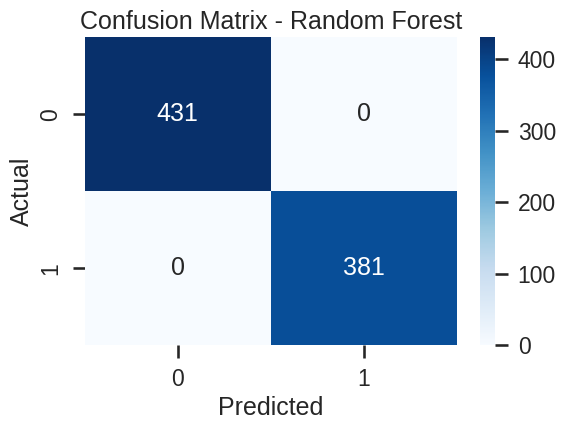

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431
           1       1.00      1.00      1.00       381

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



In [118]:
#confussion matriks model terbaik (Random Forest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Laporan lengkap
print(classification_report(y_test, y_pred))
